In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dataframe = pd.read_csv("/Users/sunny/Downloads/Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [27]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())
dataframe.info()

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

Text(0.5, 0, 'Type of Restaurant')

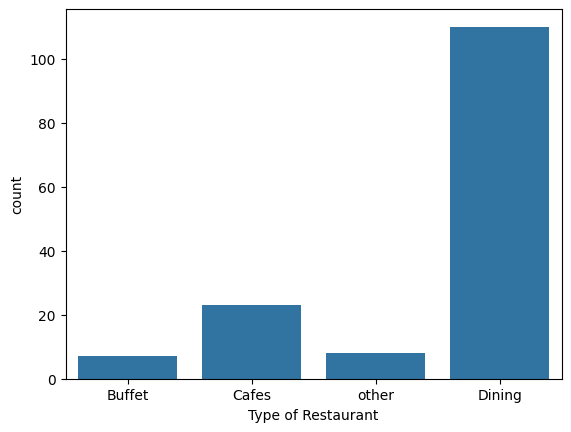

In [28]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

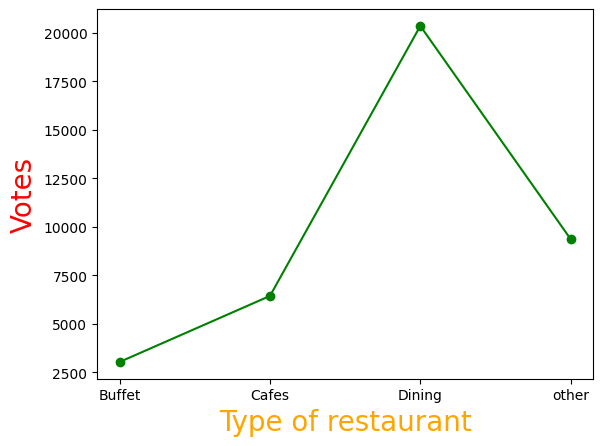

In [29]:
groupeddata=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':groupeddata})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant", c="Orange", size=20)
plt.ylabel("Votes", c="red", size=20)


In [30]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

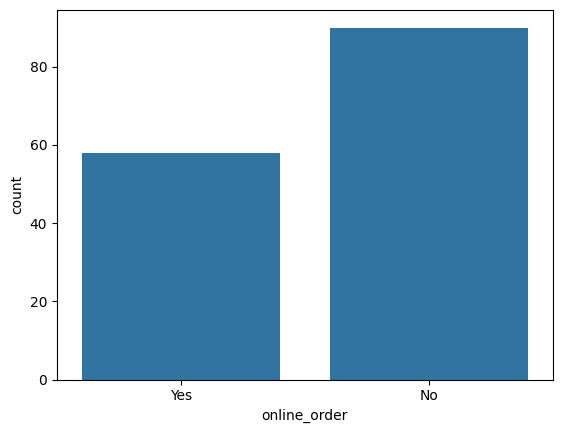

In [31]:
sns.countplot(x=dataframe['online_order'])

Text(0.5, 1.0, 'Rating Distribution')

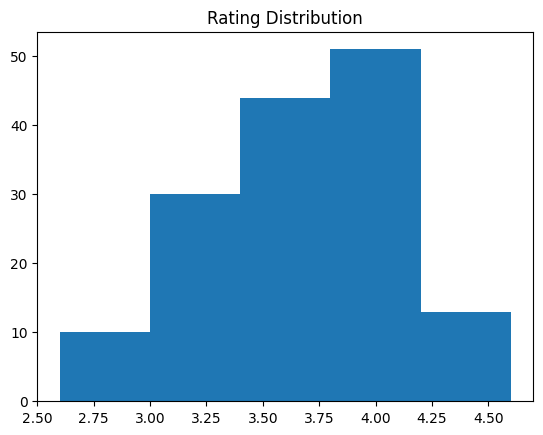

In [32]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

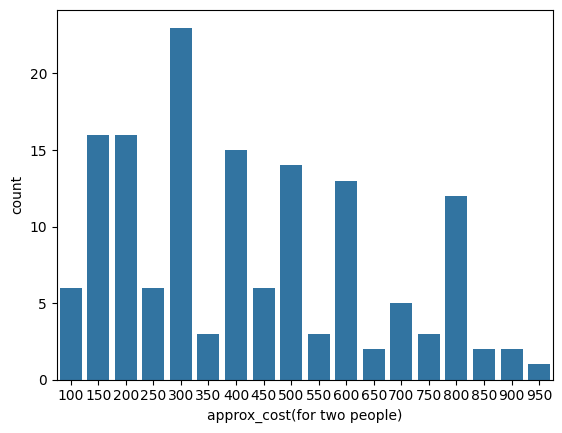

In [33]:
couple_data=dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

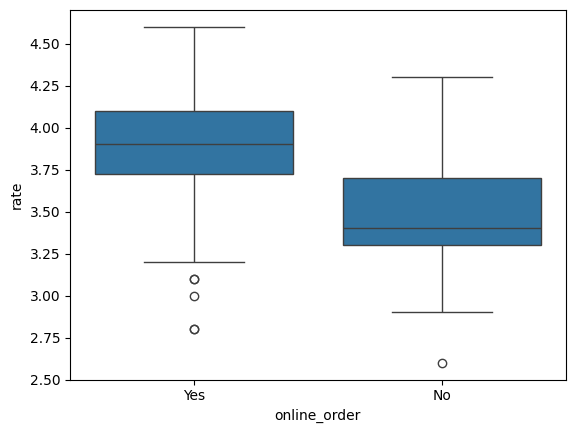

In [34]:
sns.boxplot(x='online_order',y='rate',data=dataframe)

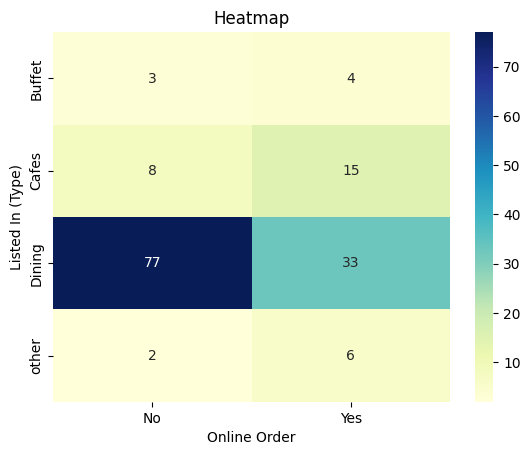

In [35]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
